In [2]:
#Random Forest feature importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import pandas as pd 


df = pd.read_csv('201029COVID19MEXICO.csv',encoding='latin1')
df.head(4)

#Y = distinctDF.filter(['SEX','AGE','NEUMONIA', 'PREGNANT','DIABETES', 'EPOC', 'ASTHMA', 'INMUSUPR','HYPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CRONIC','TOBACCO'])
#Y = distinctDF.selectExpr('SEX','AGE','NEUMONIA', 'PREGNANT','DIABETES', 'EPOC', 'ASTHMA', 'INMUSUPR',
                          #'HYPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CRONIC','TOBACCO')
#Y = df.iloc[:, -1].values
#print(Y)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,29/10/20,0a9217,1,4,9,2,9,9,5,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
1,29/10/20,1aa972,2,12,9,2,9,9,17,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,29/10/20,00f853,2,12,9,2,9,9,17,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
3,29/10/20,1315ae,2,12,11,1,11,11,27,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97


In [3]:
data = df.rename(columns={'SEXO': 'SEX',
                            'Age' : 'AGE',
                              'INTUBADO' : 'INTUBED',
                        "NEUMONIA": "NEUMONIA",
                        "Pregnant": "PREGNANT",
                       "DIABETES": "DIABETES",
                      "EPOC" : "EPOC",
                       "ASMA" : "ASTHMA",
                       "INMUSUPR":"INMUSUPR",
                       "HIPERTENSION":"HYPERTENSION",
                       "CARDIOVASCULAR":"CARDIOVASCULAR",
                       "OBESIDAD":"OBESITY",
                       "RENAL_CRONICA": "RENAL_CRONIC",
                       "OTRA_COM": "OTHER_DISEASE",
                      "TABAQUISMO":"TOBACCO",
                       "OTRO_CASO": "CONTACT_OTHER_COVID",
                       "CLASIFICACION_FINAL": "CLASSIFICACION_FINAL",
                       "UCI":"ICU",
                       "RESULTADO_LAB":"LAB_RESULT",
                        "FECHA_DEF":"DEATH",
                         'TIPO_PACIENTE': 'PATIENT_TYPE'     
                             })


In [9]:
#patient type is #9
Y = data.iloc[:,19]
print(Y)

X = data[['PATIENT_TYPE','SEX', 'AGE','NEUMONIA','PREGNANT','DIABETES','EPOC','ASTHMA','INMUSUPR','HYPERTENSION','CARDIOVASCULAR','OBESITY','RENAL_CRONIC','OTHER_DISEASE','TOBACCO','CONTACT_OTHER_COVID']]
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

0          2
1          2
2          2
3          2
4          2
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: Native, Length: 1048575, dtype: int64
         PATIENT_TYPE  SEX  AGE  NEUMONIA  PREGNANT  DIABETES  EPOC  ASTHMA  \
0                   2    2   94         2        97         2     2       2   
1                   1    2   66         2        97         1     2       2   
2                   1    2   29         2        97         2     2       2   
3                   1    1   56         2         2         2     2       2   
4                   1    1   55         2         2         1     2       2   
...               ...  ...  ...       ...       ...       ...   ...     ...   
1048570             1    2   21         2        97         2     2       2   
1048571             2    1   72         2         2         2     1       2   
1048572             1    1   28         2         1         2     2       2   
1048573             1  

In [10]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
accuracy = rf.score(X_train,y_train)
print( 'Random Forest Regression Accuracy: ', accuracy)

Random Forest Regression Accuracy:  0.08803967805606283


In [12]:
import numpy as np 
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

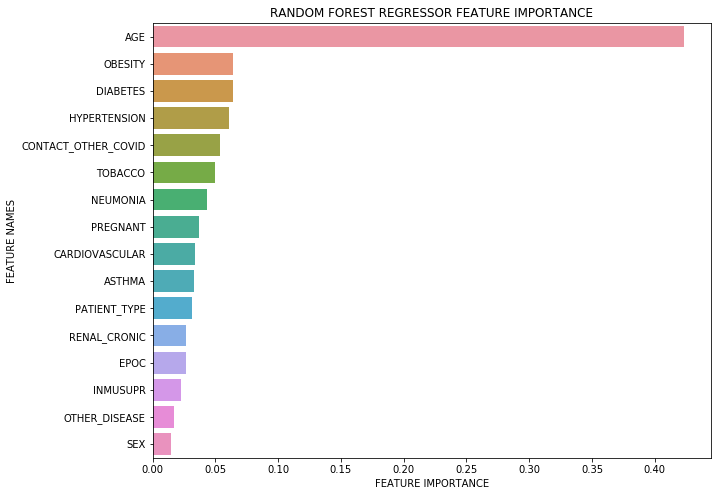

In [13]:
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST REGRESSOR ')

In [14]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Make predictions for the test set
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9546318054199219

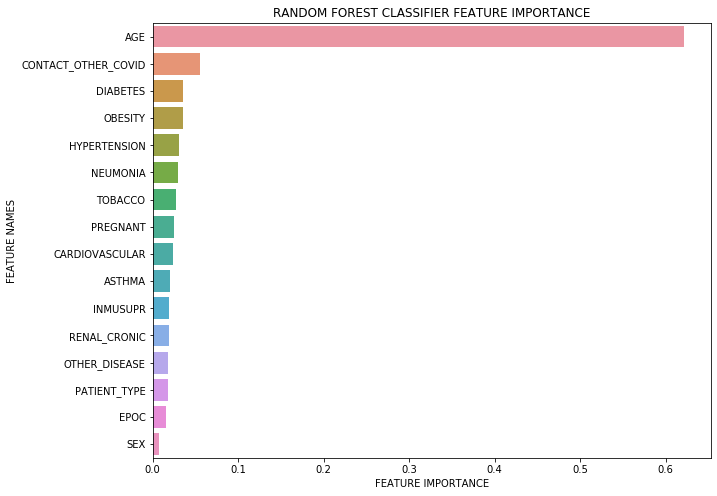

In [15]:
plot_feature_importance(forest.feature_importances_,X.columns,'RANDOM FOREST CLASSIFIER ')